In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('./weather_aus.csv')
data.dropna(inplace=True)

In [3]:
data.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01    Cobar     17.9     35.2       0.0         12.0   
6050    2009-01-02    Cobar     18.4     28.9       0.0         14.8   
6052    2009-01-04    Cobar     19.4     37.6       0.0         10.8   
6053    2009-01-05    Cobar     21.9     38.4       0.0         11.4   
6054    2009-01-06    Cobar     24.2     41.0       0.0         11.2   
...            ...      ...      ...      ...       ...          ...   
142298  2017-06-20   Darwin     19.3     33.4       0.0          6.0   
142299  2017-06-21   Darwin     21.2     32.6       0.0          7.6   
142300  2017-06-22   Darwin     20.7     32.8       0.0          5.6   
142301  2017-06-23   Darwin     19.5     31.8       0.0          6.2   
142302  2017-06-24   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6049        12.3         SSW

In [4]:
data.isnull().sum()*100/len(data)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

<Axes: >

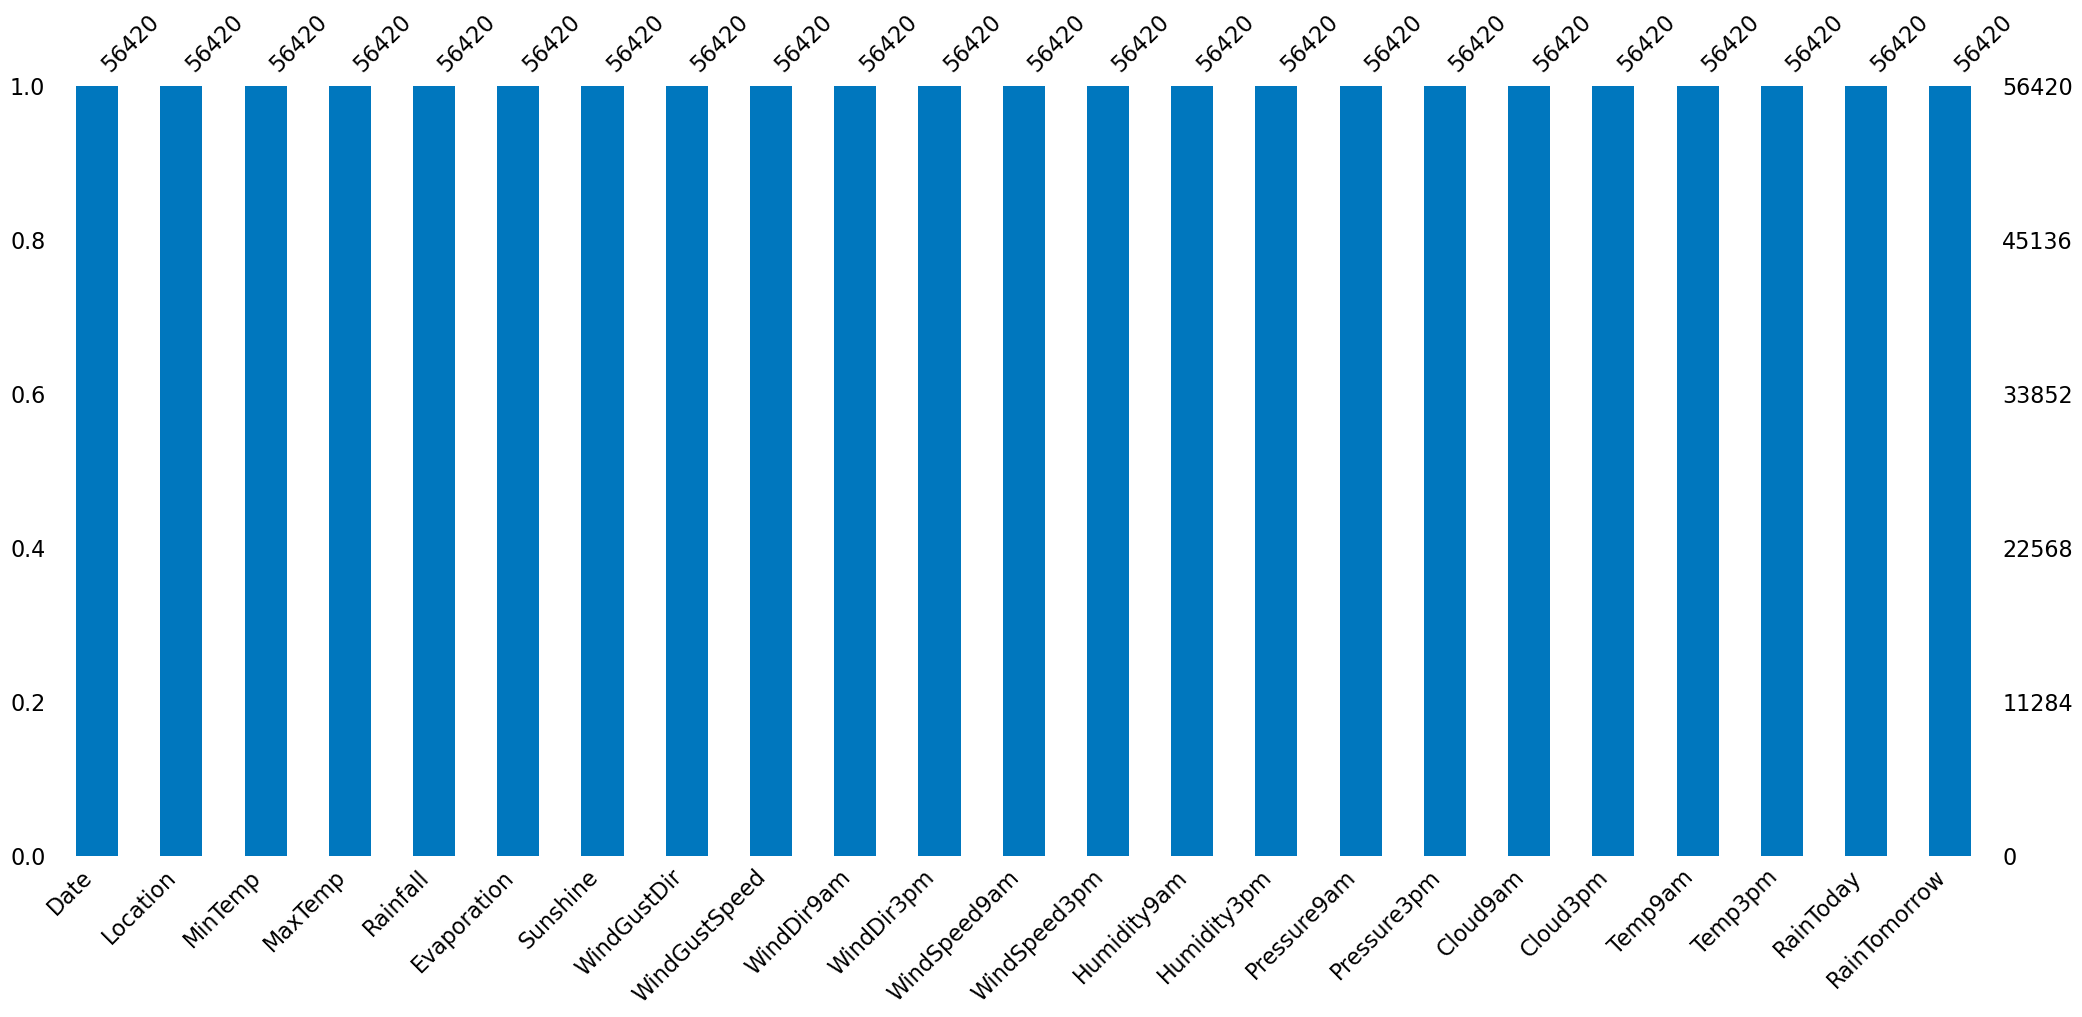

In [5]:
msno.bar(data, color="#0077be")

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['WindGustDir'] = label_encoder.fit_transform(data['WindGustDir'])
data['WindDir9am'] = label_encoder.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = label_encoder.fit_transform(data['WindDir3pm'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['RainTomorrow'] = label_encoder.fit_transform(data['RainTomorrow'])
data['RainToday'] = label_encoder.fit_transform(data['RainToday'])

print(data.dtypes)

Date              object
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object


In [7]:
X_raw = data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
Y_raw = data['RainTomorrow']

print(X_raw)
len(X_raw)

print(data.dtypes)
print(len(data))

        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049           4     17.9     35.2       0.0         12.0      12.3   
6050           4     18.4     28.9       0.0         14.8      13.0   
6052           4     19.4     37.6       0.0         10.8      10.6   
6053           4     21.9     38.4       0.0         11.4      12.2   
6054           4     24.2     41.0       0.0         11.2       8.4   
...          ...      ...      ...       ...          ...       ...   
142298         6     19.3     33.4       0.0          6.0      11.0   
142299         6     21.2     32.6       0.0          7.6       8.6   
142300         6     20.7     32.8       0.0          5.6      11.0   
142301         6     19.5     31.8       0.0          6.2      10.6   
142302         6     20.2     31.7       0.0          5.6      10.7   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
6049             11           48.0           1          12  ...   

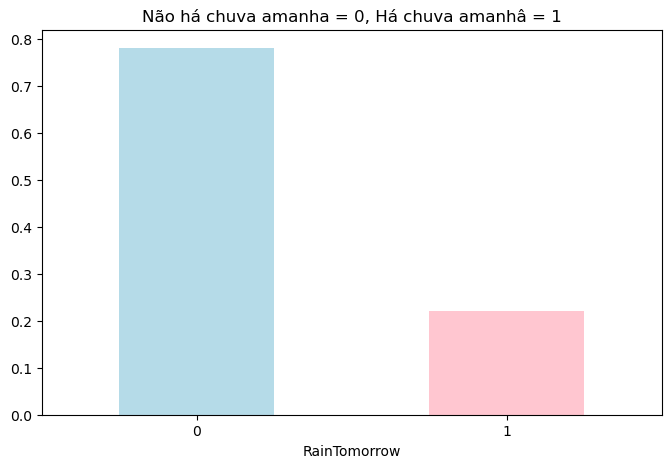

In [8]:
fig = plt.figure(figsize = (8,5))
data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','pink'], alpha = 0.9, rot=0)
plt.title('Não há chuva amanha = 0, Há chuva amanhâ = 1')
plt.show()

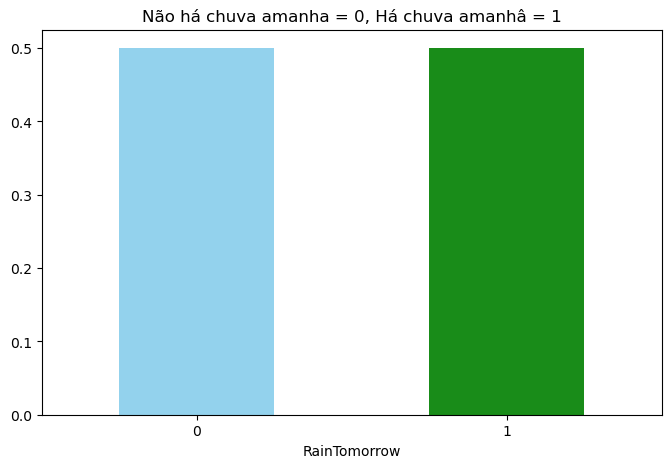

In [9]:
no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','green'], alpha = 0.9, rot=0)
plt.title('Não há chuva amanha = 0, Há chuva amanhâ = 1')
plt.show()

In [10]:
X_balanced = oversampled.drop([ "Date","RainTomorrow"], axis=1)
Y_balanced = oversampled["RainTomorrow"]

In [11]:
print(X_balanced)
len(X_balanced)

        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049           4     17.9     35.2       0.0         12.0      12.3   
6050           4     18.4     28.9       0.0         14.8      13.0   
6052           4     19.4     37.6       0.0         10.8      10.6   
6053           4     21.9     38.4       0.0         11.4      12.2   
6054           4     24.2     41.0       0.0         11.2       8.4   
...          ...      ...      ...       ...          ...       ...   
101049        12      4.9     13.5       1.8          0.8       1.9   
61706         18      2.2     11.9       0.0          2.0       0.7   
118506        16      8.8     24.3       0.0          0.8       8.4   
62083         18      9.7     12.1       2.0          1.0       0.0   
89647          2     23.9     28.4       2.6          2.6       0.6   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
6049             11           48.0           1          12  ...   

87986

In [12]:
X_balanced_train, X_balanced_test, Y_balanced_train, Y_balanced_test = train_test_split(X_balanced,Y_balanced, test_size =0.2, stratify = Y_balanced, random_state = 0)
X_raw_train, X_raw_test, Y_raw_train, Y_raw_test = train_test_split(X_raw,Y_raw, test_size =0.2, stratify = Y_raw, random_state = 0)

In [13]:
X_balanced_train.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
dtype: object

In [14]:
Y_balanced_train.dtypes

dtype('int32')

In [15]:
print(len(X_balanced_train))
print(len(X_balanced_test))
print(len(X_balanced_train)/len(X_balanced))

70388
17598
0.799990907644398


In [37]:
print(len(X_raw_train))
print(len(X_raw_test))
print(len(X_raw_train)/len(X_raw))

45136
11284
0.8


In [16]:
pca = PCA(n_components=0.6)
pca.fit(X_balanced)

PCA(n_components=0.6)

In [17]:
Z = pca.transform(X_balanced)

In [18]:
Z.mean(axis=0)

array([-1.03378897e-13,  2.31089315e-14])

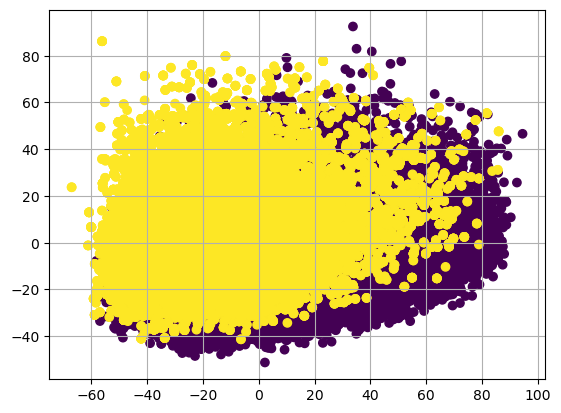

In [19]:
plt.scatter(Z[:,0],Z[:,1],c=Y_balanced)
plt.grid()

In [20]:
Z_train, Z_test, yz_train, yz_test = train_test_split(Z,Y_balanced, test_size =0.2, stratify = Y_balanced, random_state = 0)

In [21]:
scaler = StandardScaler()
X_balanced_scaled_train = scaler.fit_transform(X_balanced_train)
X_balanced_scaled_test = scaler.transform(X_balanced_test)

scaler = StandardScaler()
X_raw_scaled_train = scaler.fit_transform(X_raw_train)
X_raw_scaled_test = scaler.transform(X_raw_test)

scaler = StandardScaler()
Z_scaled_train = scaler.fit_transform(Z_train)
Z_scaled_test = scaler.transform(Z_test)

print(Z_scaled_test)

[[ 0.26935851  1.86729929]
 [-0.61370237 -0.75464726]
 [-1.48834273 -0.44994593]
 ...
 [ 1.89214849  1.92233795]
 [ 0.81042158 -0.34946834]
 [-0.37511755 -0.15241558]]


In [22]:
model_1 = LogisticRegression(max_iter=1000)
model_1.fit(X_balanced_scaled_train, Y_balanced_train)
y_pred_1 = model_1.predict(X_raw_scaled_test)
y_pred_1t = model_1.predict(X_raw_scaled_train)

model_2 = LinearSVC(C=1, max_iter=1000000)
model_2.fit(X_balanced_scaled_train, Y_balanced_train)
y_pred_2 = model_2.predict(X_raw_scaled_test)
y_pred_2t = model_2.predict(X_raw_scaled_train)

model_3 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(max_iter=100000))),).fit(X_balanced_scaled_train, Y_balanced_train)
y_pred_3 = model_3.predict(X_raw_scaled_test)
y_pred_3t = model_3.predict(X_raw_scaled_train)

model_4 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("poli_SVM", (LinearSVC(C=1, max_iter=1000000)))),).fit(X_balanced_scaled_train, Y_balanced_train)
y_pred_4 = model_4.predict(X_raw_scaled_test)
y_pred_4t = model_4.predict(X_raw_scaled_train)

model_5 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter=100000))),).fit(Z_scaled_train, yz_train)
y_pred_5 = model_5.predict(Z_scaled_test)
y_pred_5t = model_5.predict(Z_scaled_train)

c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\C

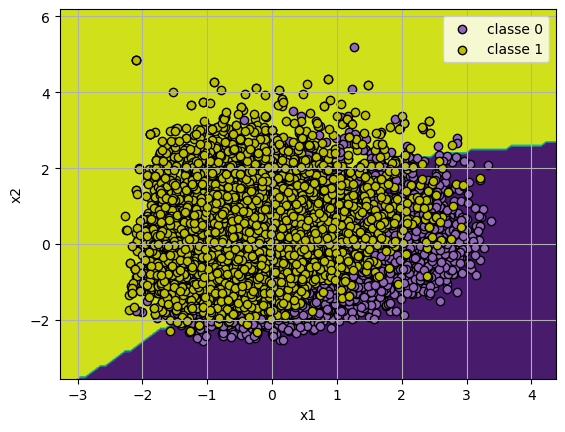

In [23]:
disp_1 = DecisionBoundaryDisplay.from_estimator(model_5,Z_scaled_test,response_method="predict",alpha=1)
disp_1.ax_.scatter(Z_scaled_test[yz_test==0,0],Z_scaled_test[yz_test==0,1],c='tab:purple',label="classe 0",edgecolor="k")
disp_1.ax_.scatter(Z_scaled_test[yz_test==1,0],Z_scaled_test[yz_test==1,1],c='y',label="classe 1",edgecolor="k")
disp_1.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_1.ax_.grid()

Confusion Matrix:
[[5835 2964]
 [ 236 2249]]
Accuracy: 71.64%


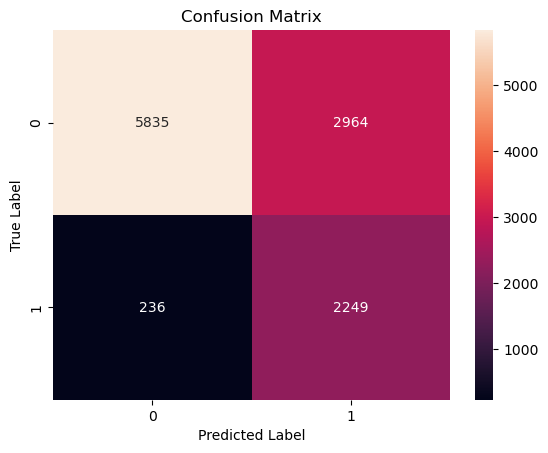

In [26]:
cm = confusion_matrix(Y_raw_test, y_pred_1)
acc_reg_test = accuracy_score(Y_raw_test, y_pred_1)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[5874 2925]
 [ 248 2237]]
Accuracy: 71.88%


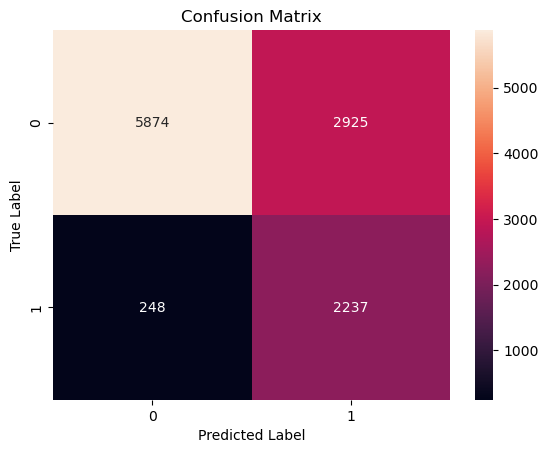

In [27]:
cm = confusion_matrix(Y_raw_test, y_pred_2)
acc_reg_test = accuracy_score(Y_raw_test, y_pred_2)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[5924 2875]
 [ 178 2307]]
Accuracy: 72.94%


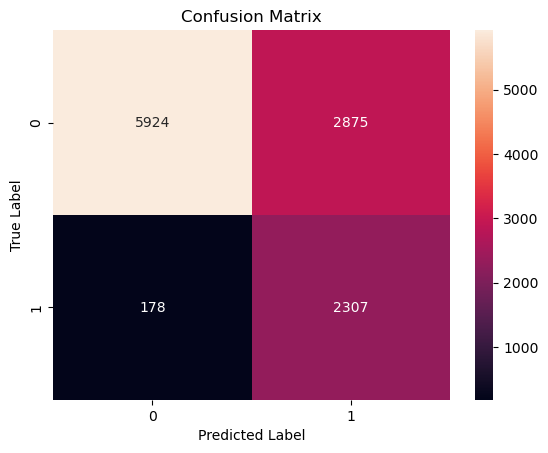

In [28]:
cm = confusion_matrix(Y_raw_test, y_pred_3)
acc_reg_test = accuracy_score(Y_raw_test, y_pred_3)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[5937 2862]
 [ 244 2241]]
Accuracy: 72.47%


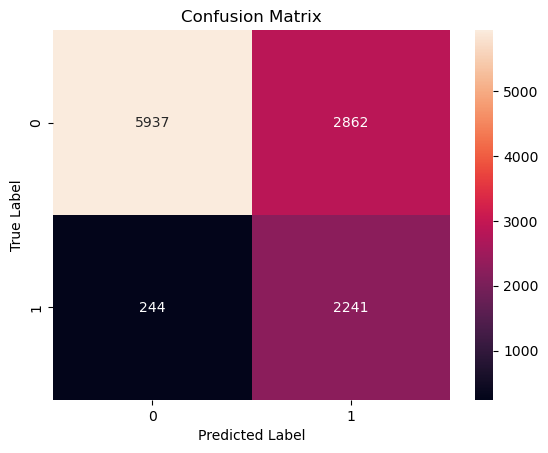

In [29]:
cm = confusion_matrix(Y_raw_test, y_pred_4)
acc_reg_test = accuracy_score(Y_raw_test, y_pred_4)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

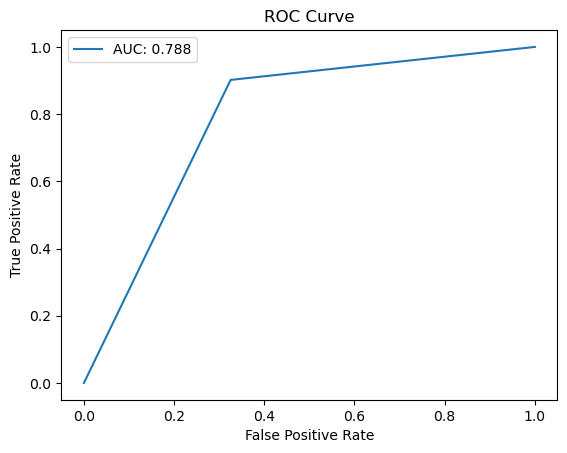

In [30]:
fpr, tpr, thresholds = roc_curve(Y_raw_test, y_pred_4)
auc = roc_auc_score(Y_raw_test, y_pred_4)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

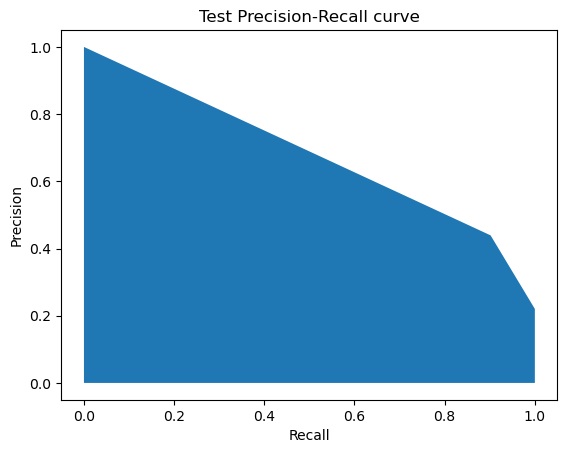

In [63]:
precision, recall, thresholds = precision_recall_curve(Y_raw_test, y_pred_4)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Test Precision-Recall curve");

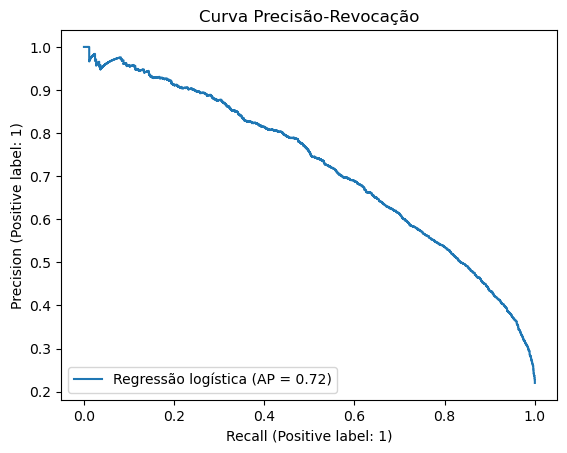

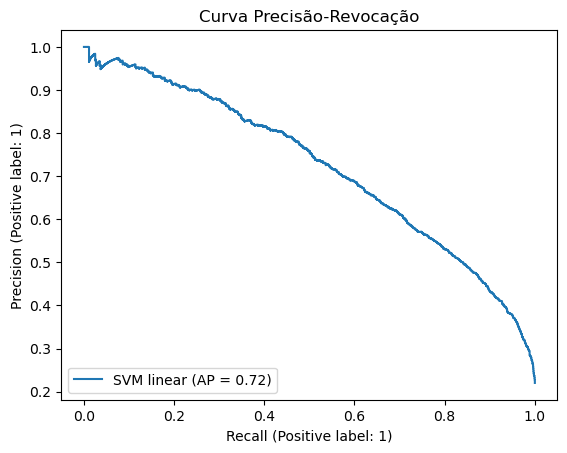

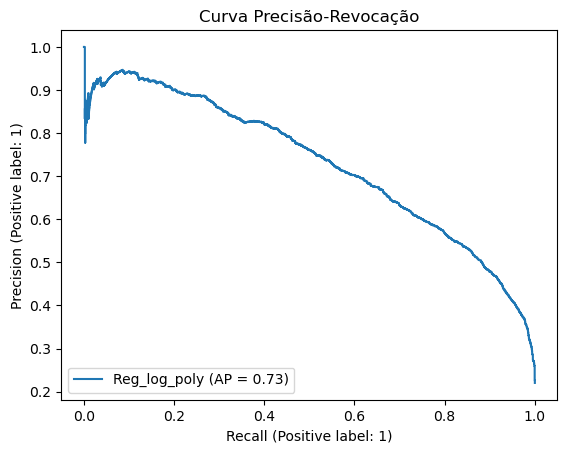

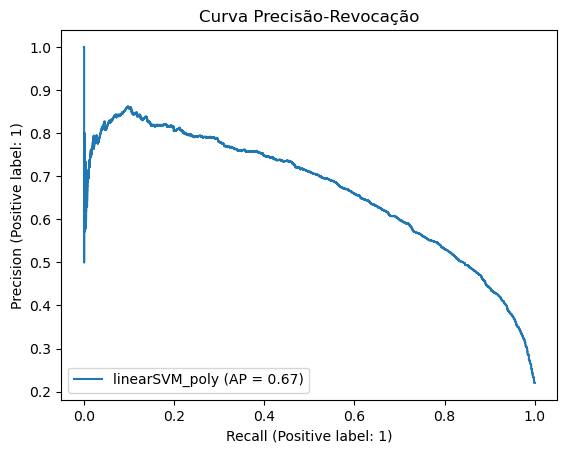

In [62]:
display = PrecisionRecallDisplay.from_estimator(model_1, X_raw_scaled_test, Y_raw_test, name="Regressão logística")
_ = display.ax_.set_title("Curva Precisão-Revocação")

display = PrecisionRecallDisplay.from_estimator(model_2, X_raw_scaled_test, Y_raw_test, name="SVM linear")
_ = display.ax_.set_title("Curva Precisão-Revocação")

display = PrecisionRecallDisplay.from_estimator(model_3, X_raw_scaled_test, Y_raw_test, name="Reg_log_poly")
_ = display.ax_.set_title("Curva Precisão-Revocação")

display = PrecisionRecallDisplay.from_estimator(model_4, X_raw_scaled_test, Y_raw_test, name="linearSVM_poly")
_ = display.ax_.set_title("Curva Precisão-Revocação")

In [32]:
accuracy = accuracy_score(Y_raw_test, y_pred_1)
accuracy_0 = accuracy_score(Y_raw_train, y_pred_1t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(Y_raw_test, y_pred_1)
report_0 = classification_report(Y_raw_train, y_pred_1t)
print(report)
print(report_0)

Accuracy: 0.7164126196384261
Accuracy: 0.7204891882311237
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      8799
           1       0.43      0.91      0.58      2485

    accuracy                           0.72     11284
   macro avg       0.70      0.78      0.68     11284
weighted avg       0.84      0.72      0.74     11284

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     35194
           1       0.44      0.90      0.59      9942

    accuracy                           0.72     45136
   macro avg       0.70      0.79      0.69     45136
weighted avg       0.84      0.72      0.74     45136



In [34]:
accuracy = accuracy_score(Y_raw_test, y_pred_2)
accuracy_0 = accuracy_score(Y_raw_train, y_pred_2t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(Y_raw_test, y_pred_2)
report_0 = classification_report(Y_raw_train, y_pred_2t)
print(report)
print(report_0)

Accuracy: 0.7188053881602269
Accuracy: 0.7247208436724566
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      8799
           1       0.43      0.90      0.59      2485

    accuracy                           0.72     11284
   macro avg       0.70      0.78      0.69     11284
weighted avg       0.84      0.72      0.74     11284

              precision    recall  f1-score   support

           0       0.96      0.68      0.79     35194
           1       0.44      0.90      0.59      9942

    accuracy                           0.72     45136
   macro avg       0.70      0.79      0.69     45136
weighted avg       0.85      0.72      0.75     45136



In [35]:
accuracy = accuracy_score(Y_raw_test, y_pred_3)
accuracy_0 = accuracy_score(Y_raw_train, y_pred_3t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(Y_raw_test, y_pred_3)
report_0 = classification_report(Y_raw_train, y_pred_3t)
print(report)
print(report_0)

Accuracy: 0.7294399149237859
Accuracy: 0.7395870258773485
              precision    recall  f1-score   support

           0       0.97      0.67      0.80      8799
           1       0.45      0.93      0.60      2485

    accuracy                           0.73     11284
   macro avg       0.71      0.80      0.70     11284
weighted avg       0.86      0.73      0.75     11284

              precision    recall  f1-score   support

           0       0.97      0.69      0.80     35194
           1       0.46      0.93      0.61      9942

    accuracy                           0.74     45136
   macro avg       0.71      0.81      0.71     45136
weighted avg       0.86      0.74      0.76     45136



In [36]:
accuracy = accuracy_score(Y_raw_test, y_pred_4)
accuracy_0 = accuracy_score(Y_raw_train, y_pred_4t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(Y_raw_test, y_pred_4)
report_0 = classification_report(Y_raw_train, y_pred_4t)
print(report)
print(report_0)

Accuracy: 0.7247429989365474
Accuracy: 0.7382577100319035
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      8799
           1       0.44      0.90      0.59      2485

    accuracy                           0.72     11284
   macro avg       0.70      0.79      0.69     11284
weighted avg       0.85      0.72      0.75     11284

              precision    recall  f1-score   support

           0       0.96      0.69      0.81     35194
           1       0.45      0.90      0.60      9942

    accuracy                           0.74     45136
   macro avg       0.71      0.80      0.70     45136
weighted avg       0.85      0.74      0.76     45136

